In [1]:
import openturns as ot

In [2]:
inVars = ["a", "b", "c", "x"]
formulas = ["a + b * exp(c * x)", "(a * x^2 + b) / (c + x^2)"]
g = ot.SymbolicFunction(inVars, formulas)
g

class=SymbolicFunction name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[a,b,c,x,y0,y1] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0,y1] formulas=[a + b * exp(c * x),(a * x^2 + b) / (c + x^2)] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0,y1] formulas=[a + b * exp(c * x),(a * x^2 + b) / (c + x^2)] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0,y1] formulas=[a + b * exp(c * x),(a * x^2 + b) / (c + x^2)]

In [3]:
size = 10
inputObservations = ot.Sample([0.5 + i for i in range(size)],1)
inputObservations

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=10 dimension=1 data=[[0.5],[1.5],[2.5],[3.5],[4.5],[5.5],[6.5],[7.5],[8.5],[9.5]]

In [4]:
p_ref = [2.8, 1.2, 0.5]
params = [0, 1, 2]
model = ot.ParametricFunction(g, params, p_ref)
model

class=FunctionImplementation name=Unnamed description=[x,y0,y1] evaluationImplementation=class=ParametricEvaluation function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[a,b,c,x,y0,y1] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0,y1] formulas=[a + b * exp(c * x),(a * x^2 + b) / (c + x^2)] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0,y1] formulas=[a + b * exp(c * x),(a * x^2 + b) / (c + x^2)] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0,y1] formulas=[a + b * exp(c * x),(a * x^2 + b) / (c + x^2)] parameters positions=[0,1,2] parameters=class=PointWithDescription name=Unnamed dimension=3 description=[a,b,c] values=[2.8,1.2,0.5] input positions=[3] gradientImplementation=class=ParametricGradient evaluation=class=ParametricEvaluation function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[a,b,c,x,y0,y1] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0,y1] formulas=[a + b * exp(c * x),(a * x^2 + b) / (c + x^2)] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0,y1] formulas=[a + b * exp(c * x),(a * x^2 + b) / (c + x^2)] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0,y1] formulas=[a + b * exp(c * x),(a * x^2 + b) / (c + x^2)] parameters positions=[0,1,2] parameters=class=PointWithDescription name=Unnamed dimension=3 description=[a,b,c] values=[2.8,1.2,0.5] input positions=[3] hessianImplementation=class=ParametricHessian evaluation=class=ParametricEvaluation function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[a,b,c,x,y0,y1] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0,y1] formulas=[a + b * exp(c * x),(a * x^2 + b) / (c + x^2)] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0,y1] formulas=[a + b * exp(c * x),(a * x^2 + b) / (c + x^2)] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[a,b,c,x] outputVariablesNames=[y0,y1] formulas=[a + b * exp(c * x),(a * x^2 + b) / (c + x^2)] parameters positions=[0,1,2] parameters=class=PointWithDescription name=Unnamed dimension=3 description=[a,b,c] values=[2.8,1.2,0.5] input positions=[3]

In [5]:
modelObservations = model(inputObservations)
modelObservations[0:5]

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=5 dimension=2 description=[y0,y1] data=[[4.34083,2.53333],[5.3404,2.72727],[6.98841,2.77037],[9.70552,2.78431],[14.1853,2.79036]]

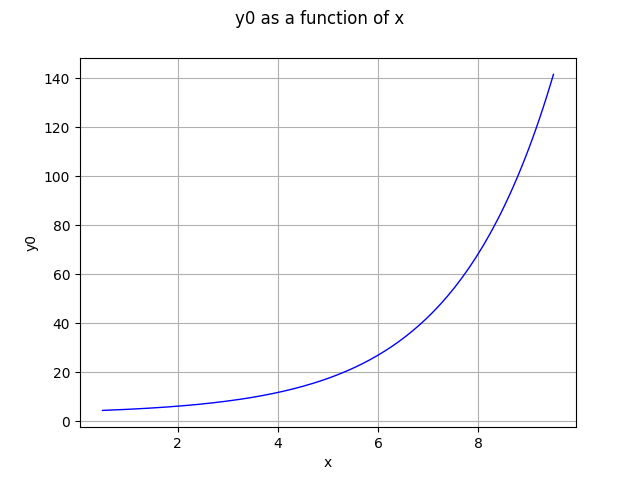

In [6]:
model.getMarginal(0).draw(0.5,9.5)

In [7]:
outputDimension = modelObservations.getDimension()
outputDimension

2

In [8]:
parameterDimension = model.getParameter().getDimension()

In [9]:
candidate = ot.Point([1.0]*3)
candidate

class=Point name=Unnamed dimension=3 values=[1,1,1]

In [10]:
model.setParameter(candidate)

In [11]:
transposedGradientObservations = ot.Matrix(parameterDimension,size*outputDimension)
for i in range(size):
    g = model.parameterGradient(inputObservations[i])
    for j in range(outputDimension):
        for k in range(parameterDimension):
            transposedGradientObservations[k,i*outputDimension + j] = g[k,j]
transposedGradientObservations

class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=3 columns=20 values=[1,1.64872,0.824361,0.2,0.8,-0.8,1,4.48169,6.72253,0.692308,0.307692,-0.307692,1,12.1825,30.4562,0.862069,0.137931,-0.137931,1,33.1155,115.904,0.924528,0.0754717,-0.0754717,1,90.0171,405.077,0.952941,0.0470588,-0.0470588,1,244.692,1345.81,0.968,0.032,-0.032,1,665.142,4323.42,0.976879,0.0231214,-0.0231214,1,1808.04,13560.3,0.982533,0.0174672,-0.0174672,1,4914.77,41775.5,0.986348,0.0136519,-0.0136519,1,13359.7,126917,0.989041,0.0109589,-0.0109589]

In [12]:
gradientObservations = transposedGradientObservations.transpose()
gradientObservations

class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=20 columns=3 values=[1,0.2,1,0.692308,1,0.862069,1,0.924528,1,0.952941,1,0.968,1,0.976879,1,0.982533,1,0.986348,1,0.989041,1.64872,0.8,4.48169,0.307692,12.1825,0.137931,33.1155,0.0754717,90.0171,0.0470588,244.692,0.032,665.142,0.0231214,1808.04,0.0174672,4914.77,0.0136519,13359.7,0.0109589,0.824361,-0.8,6.72253,-0.307692,30.4562,-0.137931,115.904,-0.0754717,405.077,-0.0470588,1345.81,-0.032,4323.42,-0.0231214,13560.3,-0.0174672,41775.5,-0.0136519,126917,-0.0109589]

In [13]:
import numpy as np

In [14]:
np.linalg.cond(gradientObservations)

36772.610218841444